# Calibration analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fast')

cal = pd.read_csv('calibrations.csv', sep=',')
cal.head()

,0,500,1000,2000
0,-0.007994,0.027154,0.009580,0.000793
1,-0.009859,0.025289,0.007715,-0.001072
2,-0.007727,0.027421,0.009847,0.001060
3,-0.008793,0.026355,0.008781,-0.000006
4,-0.008260,0.026888,0.009314,0.000527


In [2]:
(cal['0'].mean(),\
cal['500'].mean(),\
cal['1000'].mean(),\
cal['2000'].mean())

(-0.008800164321795444,
 0.026347782297230907,
 0.00877380872541313,
 -1.3177755156543078e-05)

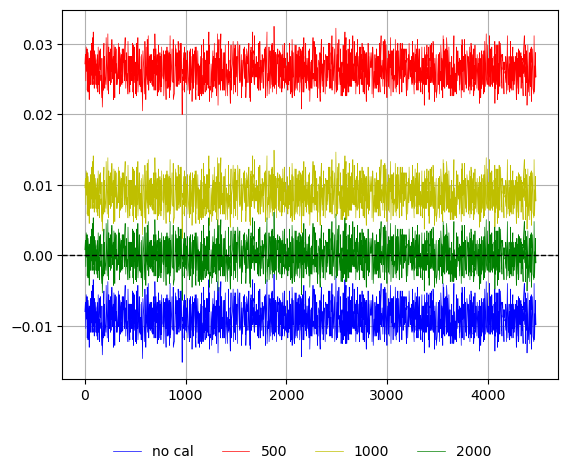

In [50]:
x = np.arange(0, cal["0"].size)
fig, ax = plt.subplots()
ax.plot(x, cal["0"], linewidth=.5, color='b', label='no cal')
ax.plot(x, cal["500"], linewidth=.5, color='r', label='500')
ax.plot(x, cal["1000"], linewidth=.5, color='y', label='1000')
ax.plot(x, cal["2000"], linewidth=.5, color='g', label='2000')

ax.axhline(0, color='black', linewidth=1, linestyle='--')
ax.grid(True)

fig.legend(frameon=False, ncol=4, bbox_to_anchor=(0.5, 0.0), loc='upper center')
fig.savefig('imgs/calibrations.png', bbox_inches='tight')
plt.show()

# Angle estimation with gyroscope

In [43]:
gyro_est = pd.read_csv('gyro_estimate.csv')
gyro_est

,values
0,-0.000004
1,-0.000015
2,-0.000017
3,-0.000019
4,-0.000026
...,...
30484,0.026090
30485,0.026162
30486,0.026159
30487,0.026111


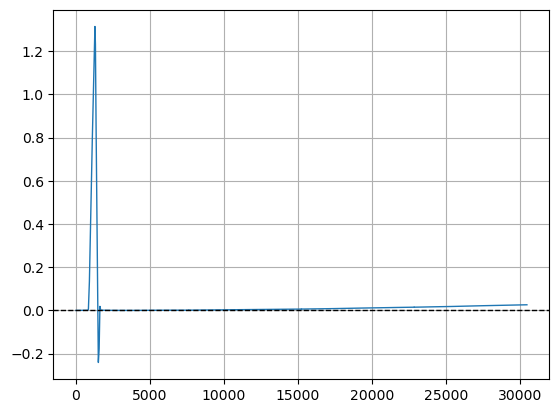

In [84]:
angle_val = gyro_est['values']
x = np.arange(0, angle_val.size)
plt.plot(x, angle_val, linewidth=1)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid(True)
plt.savefig('imgs/estimated_roll_angle_gyro.png', bbox_inches='tight')
plt.show()

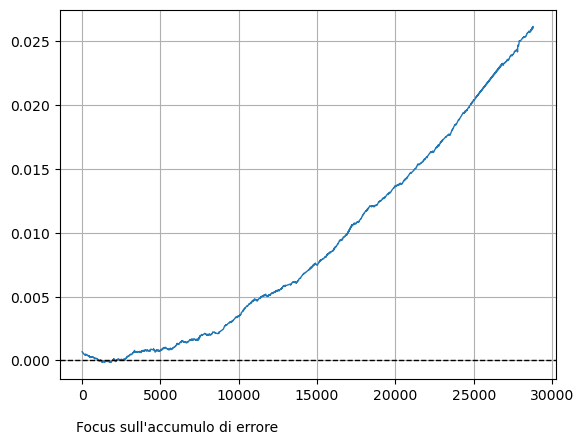

In [85]:
angle_val1 = angle_val[1700:]
x = np.arange(0, angle_val1.size)

fig, ax = plt.subplots()

ax.plot(x, angle_val1, linewidth=1)

fig.text(0.15, 0.0, "Focus sull'accumulo di errore")
ax.axhline(0, color='black', linewidth=1, linestyle='--')
ax.grid(True)
fig.savefig('imgs/focused_estimated_roll_angle_gyro.png', bbox_inches='tight')

plt.show()